# <center> Заголовок
## <center>Часть 1. 


Предисловие... Перед началом работы импортируем все необходимые модули и инициализируем `plotly` с помощью команды `init_notebook_mode`.

Режим презентации jupyter nbconvert my_script.ipynb --to slides --post serve

https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67

In [132]:
# запуск презентации
# ! jupyter nbconvert Jupyter_tricks.ipynb --to slides --post serve

In [133]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3

import pandas as pd
import seaborn as sns


# to make this notebook's output stable across runs
np.random.seed(42)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (10, 5)

Populating the interactive namespace from numpy and matplotlib


### Визуализации средствами pandas

In [134]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


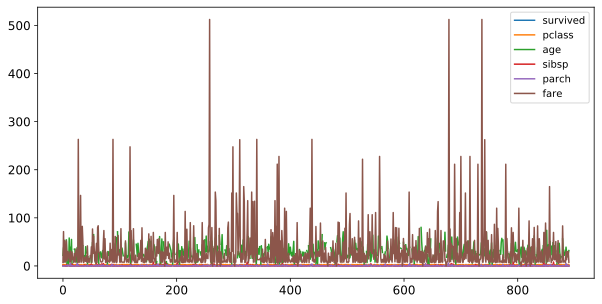

In [135]:
df.plot();

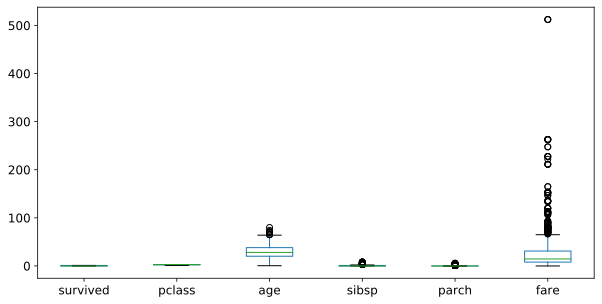

In [136]:
df.plot.box()

In [137]:
df.head().to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>survived</th>\n      <th>pclass</th>\n      <th>sex</th>\n      <th>age</th>\n      <th>sibsp</th>\n      <th>parch</th>\n      <th>fare</th>\n      <th>embarked</th>\n      <th>class</th>\n      <th>who</th>\n      <th>adult_male</th>\n      <th>deck</th>\n      <th>embark_town</th>\n      <th>alive</th>\n      <th>alone</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>0</td>\n      <td>3</td>\n      <td>male</td>\n      <td>22.0</td>\n      <td>1</td>\n      <td>0</td>\n      <td>7.2500</td>\n      <td>S</td>\n      <td>Third</td>\n      <td>man</td>\n      <td>True</td>\n      <td>NaN</td>\n      <td>Southampton</td>\n      <td>no</td>\n      <td>False</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>1</td>\n      <td>1</td>\n      <td>female</td>\n      <td>38.0</td>\n      <td>1</td>\n      <td>0</td>\n      <td>71.2833</td>\n      <t

In [138]:
print(df.sex[:10].tolist())

['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female']


In [139]:
def color_negative_red(val, thresh=3):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < thresh else 'black'
    return 'color: %s' % color


df.loc[4:10, ['age', 'sibsp', 'parch', 'fare']].style.applymap(color_negative_red)

,age,sibsp,parch,fare
4,35.000000,0,0,8.050000
5,nan,0,0,8.458300
6,54.000000,0,0,51.862500
7,2.000000,3,1,21.075000
8,27.000000,0,2,11.133300
9,14.000000,1,0,30.070800
10,4.000000,1,1,16.700000


In [140]:
df.head().style.highlight_max().format(None, na_rep="-")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,-,Southampton,no,False
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,-,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,-,Southampton,no,True


In [141]:
cm = sns.light_palette("green", as_cmap=True)
# df.head(10).style.background_gradient(cmap=cm)
df.head(10).style.background_gradient(cmap='viridis')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,nan,Southampton,no,False
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,nan,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,nan,Southampton,no,True
5,0,3,male,nan,0,0,8.458300,Q,Third,man,True,nan,Queenstown,no,True
6,0,1,male,54.000000,0,0,51.862500,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.000000,3,1,21.075000,S,Third,child,False,nan,Southampton,no,False
8,1,3,female,27.000000,0,2,11.133300,S,Third,woman,False,nan,Southampton,yes,False
9,1,2,female,14.000000,1,0,30.070800,C,Second,child,False,nan,Cherbourg,yes,False


In [142]:
df.head().style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,nan,Southampton,no,False
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,nan,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,nan,Southampton,no,True


In [143]:
df.head().style.set_precision(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,nan,Southampton,no,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,nan,Southampton,yes,True
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,nan,Southampton,no,True


In [144]:
df[['pclass','sex', 'survived']].groupby(['pclass','sex']).count().style.bar()

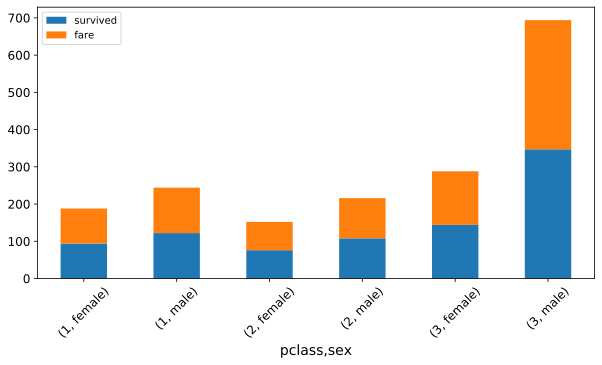

In [145]:
df[['pclass','sex', 'survived', 'fare']].groupby(['pclass','sex']).count().plot(kind='bar', rot=45, stacked = True)

Text(0.5, 1.0, 'title')

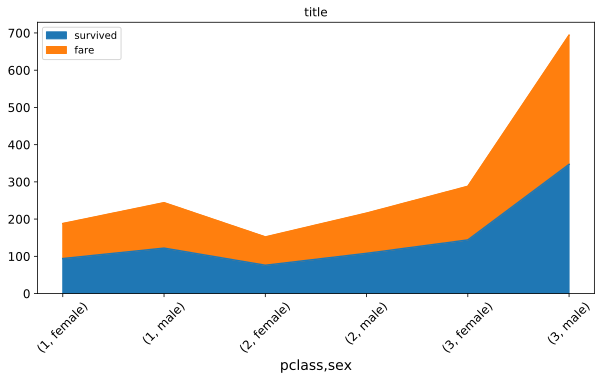

In [146]:
df[['pclass','sex', 'survived', 'fare']].\
groupby(['pclass','sex']).count().\
plot(kind='area', rot=45, stacked = True).set_title('title')

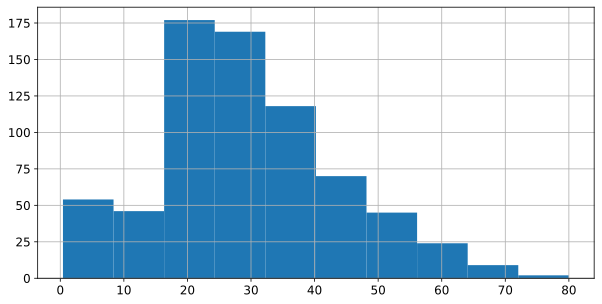

In [147]:
df['age'].hist(bins=10)

### Полезные ссылки
 * [Документация pandas.plot](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
 * [Документация pandas.style](http://pandas.pydata.org/pandas-docs/stable/style.html)

### seaborn

In [149]:
# sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", 
#             linewidths=0.5);

### Полезные ссылки
* [Tutorial](https://seaborn.pydata.org/tutorial.html)
* [Gellery](https://seaborn.pydata.org/examples/index.html)

### Магические методы ipython notebook

https://nuancesprog.ru/p/8099/

In [150]:
%%time
import numpy as np

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 28.6 µs


In [151]:
%who

Image	 IncrementalBar	 IntProgress	 alive_bar	 alive_progress	 axes3d	 cl	 cm	 color_negative_red	 
count	 data	 df	 df_sorted	 fig	 go	 i	 init_notebook_mode	 iplot	 
layout	 max_count	 mylist	 pd	 plotly	 progress	 sns	 tqdm	 trace0	 
trace1	 traceback	 traces	 unicode_literals	 ups	 warnings	 


In [152]:
%%html
<html>
<body>
<a href="">Link</a>
<table>
        <tr> 
            <th>Name</th> 
            <th>Country</th> 
            <th>Age</th> 
        </tr> 
        <tr> 
            <td>Sid</td> 
            <td>India</td> 
            <td>22</td> 
        </tr>
        <tr> 
            <td>Dave</td> 
            <td>UK</td> 
            <td>28</td> 
        </tr>
</table>
</body>
</html>

Name,Country,Age
Sid,India,22
Dave,UK,28


### Отобразить изображение

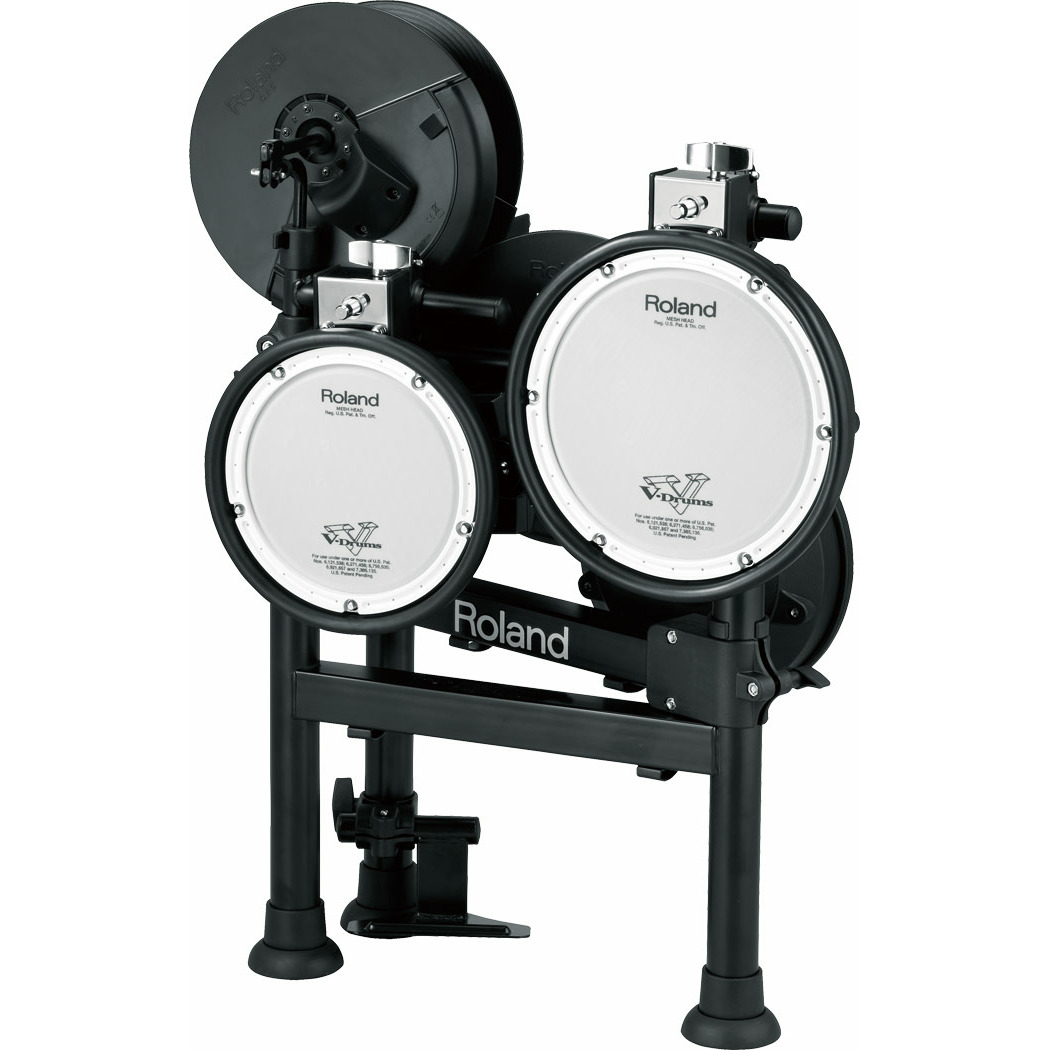

In [153]:
from IPython.display import Image
Image('roland.jpeg')

In [154]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Plotly

In [155]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [156]:
df.groupby('pclass').count()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
pclass,,,,,,,,,,,,,,
1,216,216,186,216,216,216,214,216,216,216,175,214,216,216
2,184,184,173,184,184,184,184,184,184,184,16,184,184,184
3,491,491,355,491,491,491,491,491,491,491,12,491,491,491


In [157]:
df_sorted = df.sort_values(['age', 'fare']).reset_index()
df_sorted

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
1,755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
2,469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
3,644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
4,831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,306,1,1,female,NaN,0,0,110.8833,C,First,woman,False,NaN,Cherbourg,yes,True
887,334,1,1,female,NaN,1,0,133.6500,S,First,woman,False,NaN,Southampton,yes,False
888,31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
889,527,0,1,male,NaN,0,0,221.7792,S,First,man,True,C,Southampton,no,True


In [158]:
trace0 = go.Scatter(
    x=df_sorted.index,
    y=df_sorted.fare,
    name='fare'
)

trace1 = go.Scatter(
    x=df_sorted.index,
    y=df_sorted.age,
    name='age'
)

data = [trace0, trace1]
layout = {'title': 'Statistics'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [159]:
# Также можно сразу сохранить график в виде html-файла
# plotly.offline.plot(fig, filename='filename.html', show_link=False);

In [160]:
traces = []
for cl in ['First', 'Second', 'Third']:
    traces.append(
        go.Histogram(
            x=df[df['class'] == cl].fare,
            histnorm='probability', 
            name = cl, 
            visible = (cl == 'First'))
    )
    
layout = go.Layout(
    title='Fare Distribution',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True] + [False]*2],
                    label='First',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False] + [True] + [False]],
                    label='Second',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*2 + [True]],
                    label='Third',
                    method='restyle'
                ),

            ]),
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

### Рекомендации по выбору визуализации

https://apandre.files.wordpress.com/2011/02/chartchooserincolor.jpg
https://www.visual-literacy.org/periodic_table/periodic_table.html
https://flowingdata.com/category/tutorials/

### Матрицы и формулы

<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/1f96c71f0a99eac3ee872e7baf22e84324d7b4c9' style="width: 80%"></img>

\begin{equation*}
\LARGE
c = 
\begin{bmatrix}
    c_{11} & c_{12} \dots c_{1n} \\
    c_{21} & c_{22} \dots c_{2n} \\
    \vdots & \vdots \dots \vdots \\
    c_{l1} & c_{l2} \dots c_{ln}
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\LARGE
c_{ij} = \sum_{k=1}^m a_{ik} b_{kj}
\end{equation*}

\begin{equation*}
\LARGE
x + 3*y = 9 \\
\LARGE
2*x - 4*y = 8
\end{equation*}

### Прогрессбары

In [162]:
!pip install progress

In [163]:
!pip install alive_progress 

In [164]:
import time
import progress
from progress.bar import IncrementalBar
from tqdm import tqdm 
import alive_progress 
from alive_progress import alive_bar

In [165]:
mylist = [1,2,3,4,5,6,7,8]

for i in tqdm(mylist):
    time.sleep(1)

100%|██████████| 8/8 [00:08<00:00,  1.00s/it]


In [166]:
from ipywidgets import IntProgress
from IPython.display import display
import time

max_count = 100
f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar

count = 0
while count <= max_count:
    f.value += 1 # signal to increment the progress bar
    time.sleep(.05)
    count += 1

IntProgress(value=0)

In [167]:
ups = '123a'
import traceback

try:
    float(ups)

except Exception:
    print(traceback.print_exc())
    
print('Проехали')

None
Проехали


Traceback (most recent call last):
  File "<ipython-input-167-75de1bb305d4>", line 5, in <module>
    float(ups)
ValueError: could not convert string to float: '123a'


### Про экспорт из YAML

In [ ]:
!pip install pyyaml

In [168]:
from yaml import load

In [170]:
config = load( open('config.yaml', encoding='utf-8') )
config

{'accounts': {'vk': {'username': 'i_love_ds', 'password': 'turnOnOAuth2.0'},
  'facebook': 'none'},
 'cities': ['Санкт-Петербург',
  'Одесса',
  'Севастополь',
  'Волгоград',
  'Киев',
  'Брест',
  'Москва'],
 'model': {'n_samples': 1000000, 'min_freq': 0.0001},
 'lst': ['item1', 'item2'],
 'dct': {'dct_item1': 'value1', 'dct_item2': 'value2'}}